In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import seaborn as sns

In [3]:
#Importing Url
url = "https://dot.ca.gov/programs/procurement-and-contracts/contracts-out-for-bid"    #open link
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html)

In [5]:
title = soup.title
print(title)
print(title.text)

<title property="og:title">Contracts Out for Bid | Caltrans</title>
Contracts Out for Bid | Caltrans


In [6]:
links = soup.find_all('a', href=True)
for link in links:
    print(link['href'])

#main-content
https://www.ca.gov/
/about-caltrans
/contact-us
/-/media/dot-media/documents/caltrans-2021-simm-25-b-certification_onfile-a11y.pdf
/request-ada-compliant-documents
/
/
/travel
/work-with-caltrans
/programs
/caltrans-near-me
javascript:;
/
/programs
/programs/procurement-and-contracts
https://caleprocure.ca.gov/pages/public-search.aspx
https://caleprocure.ca.gov/event/2660/01A6228
https://caleprocure.ca.gov/event/2660/02A2151
https://caleprocure.ca.gov/event/2660/03A3492
https://caleprocure.ca.gov/event/2660/03A3503
https://caleprocure.ca.gov/event/2660/04A6476
https://caleprocure.ca.gov/event/2660/04A6497
https://caleprocure.ca.gov/event/2660/04A6498
https://caleprocure.ca.gov/event/2660/04A6510
https://caleprocure.ca.gov/event/2660/04A6524
https://caleprocure.ca.gov/event/2660/06A2855
https://caleprocure.ca.gov/event/2660/09A0882
https://caleprocure.ca.gov/event/2660/10A2418
https://caleprocure.ca.gov/event/2660/10A2440
https://caleprocure.ca.gov/event/2660/10A2445
https

In [7]:
data = []
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
    dataRow = []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
data = data[1:]
print(data[-2:])

[['10A2445', 'SB Minor B 10A2445 Concrete Invert Paving and Rock Slope Protection in Mariposa County', '08/12/22 - 2:15PM PDT'], ['32A0541', 'IFB Auctioneering Services to Dispose of Retired Equipment, Northern California', '08/16/22 - 2:00PM PDT']]


In [8]:
df = pd.DataFrame(data)
print(data)

[['01A6228\n', 'Clearance and Demolition Services Fortuna, CA', '08/16/22 - 2:00PM PDT\n'], ['02A2151', 'IFB Janitorial and Custodial Grounds Maintenance Services at the Secret Valley Safety Roadside Rest Area (SRRA) in Lassen County.', '08/16/22 - 2:00PM PDT'], ['03A3492\n', 'SB Minor B 03A3492 - Install Cured-In-Place Pipeliners in Placer County', '08/19/22 - 2:15PM PDT'], ['03A3503', 'SB Minor B 03A3503-Roadway Excavation, place HMA overside drain and HMA dike in Yolo County', '08/17/22 - 2:15PM PDT'], ['04A6476', 'IFB Multiple Provider Unsheltered Resident Encampment Site Waste Removal and Cleanup or Clean Only Services in the East Bay Area', '08/18/22 - 2:00PM PDT'], ['04A6497\n', 'Operated Equipment Rental Services in Alameda, Contra Costa, Sacramento, Solano, San Mateo, Lake, San Francisco, Santa Clara, Marin, Sonoma, and Napa Counties', '08/16/22 - 2:00PM PDT'], ['04A6498', 'Operated Equipment Rental Services in Alameda, Contra Costa, Sacramento, Solano, San Mateo, San Francisc

In [9]:
df = pd.DataFrame(data)
print(df.head())
print(df.tail())

           0                                                  1  \
0  01A6228\n      Clearance and Demolition Services Fortuna, CA   
1    02A2151  IFB Janitorial and Custodial Grounds Maintenan...   
2  03A3492\n  SB Minor B 03A3492 - Install Cured-In-Place Pi...   
3    03A3503  SB Minor B 03A3503-Roadway Excavation, place H...   
4    04A6476  IFB Multiple Provider Unsheltered Resident Enc...   

                         2  
0  08/16/22 - 2:00PM PDT\n  
1    08/16/22 - 2:00PM PDT  
2    08/19/22 - 2:15PM PDT  
3    08/17/22 - 2:15PM PDT  
4    08/18/22 - 2:00PM PDT  
            0                                                  1  \
10    09A0882  IFB Concrete Sidewalk Repairs and Picnic Table...   
11    10A2418  Inductive Loop Detector Repair and Replacement...   
12  10A2440\n  Trash and Recycling Collection, Hauling, and D...   
13    10A2445  SB Minor B 10A2445 Concrete Invert Paving and ...   
14    32A0541  IFB Auctioneering Services to Dispose of Retir...   

              

In [10]:
header_list =[]
col_headers = soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Event ID', 'Event Name', 'End Date']


In [11]:
df.columns = header_list
print(df.head())

    Event ID                                         Event Name  \
0  01A6228\n      Clearance and Demolition Services Fortuna, CA   
1    02A2151  IFB Janitorial and Custodial Grounds Maintenan...   
2  03A3492\n  SB Minor B 03A3492 - Install Cured-In-Place Pi...   
3    03A3503  SB Minor B 03A3503-Roadway Excavation, place H...   
4    04A6476  IFB Multiple Provider Unsheltered Resident Enc...   

                  End Date  
0  08/16/22 - 2:00PM PDT\n  
1    08/16/22 - 2:00PM PDT  
2    08/19/22 - 2:15PM PDT  
3    08/17/22 - 2:15PM PDT  
4    08/18/22 - 2:00PM PDT  


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Event ID    15 non-null     object
 1   Event Name  15 non-null     object
 2   End Date    15 non-null     object
dtypes: object(3)
memory usage: 488.0+ bytes


In [13]:
df.shape

(15, 3)

In [14]:
df.describe()

,Event ID,Event Name,End Date
count,15,15,15
unique,15,15,9
top,01A6228\n,"Clearance and Demolition Services Fortuna, CA",08/16/22 - 2:00PM PDT
freq,1,1,5


In [15]:
#Saving output to csv file

In [16]:
df.to_csv(r'C:/Users/user/Dropbox/PC/Desktop/Machine Learning/Taiyo/web scrapping/Tender.csv', index = False, header = True)

In [17]:
#reading the saved csv file

In [18]:
df = pd.read_csv("Tender.csv")

In [19]:
df.head()

,Event ID,Event Name,End Date
0,01A6228\n,"Clearance and Demolition Services Fortuna, CA",08/16/22 - 2:00PM PDT\n
1,02A2151,IFB Janitorial and Custodial Grounds Maintenan...,08/16/22 - 2:00PM PDT
2,03A3492\n,SB Minor B 03A3492 - Install Cured-In-Place Pi...,08/19/22 - 2:15PM PDT
3,03A3503,"SB Minor B 03A3503-Roadway Excavation, place H...",08/17/22 - 2:15PM PDT
4,04A6476,IFB Multiple Provider Unsheltered Resident Enc...,08/18/22 - 2:00PM PDT


In [20]:
#renaming of column name for data analysis

In [21]:
df.rename(columns = {'Event ID':'Event_ID', 'Event Name':'Event_Name', 'End Date':'End_Date'}, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\user\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


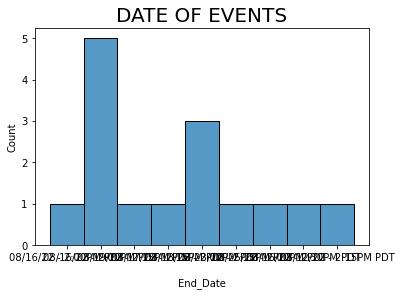

In [22]:
plt.title('DATE OF EVENTS', fontsize=20)
hist = sns.histplot(df.End_Date)

C:\Users\user\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\user\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\user\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified 

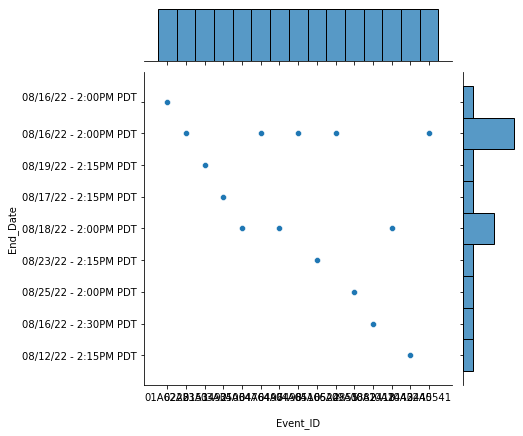

In [23]:
d1 = sns.jointplot(data=df, x='Event_ID', y='End_Date')